In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorlayer as tl

In [2]:
def rgb2mono(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    # mono = 0.2989 * r + 0.5870 * g + 0.1140 * b
    mono = 0.5 * r + 0.25 * g + 0.25 * b
    return mono

In [3]:
sess = tf.InteractiveSession()

In [4]:
def prepareDataArrays(iterator):
    X = np.zeros(4800)
    y = np.zeros(1)
    recordCounter = 0;

    for string_record in iterator:
        recordCounter += 1

        example = tf.train.Example()
        example.ParseFromString(string_record)
        imageString = (example.features.feature['image'].bytes_list.value[0])
        label = (example.features.feature['label'].int64_list.value[0])

        image = np.fromstring(imageString, dtype=np.uint8)
        image = image.reshape((60, 80, 3))
        image = rgb2mono(image)
        image = image.reshape((4800))

        X = np.vstack((X,image))
        y = np.append(y,label)
        if recordCounter % 100 == 0:
            print(recordCounter,end = '->')

    y = y.reshape((recordCounter + 1,))
#     y = np.round(y / 7) #Downsampling
#     y = y + 6
    y = np.round(y / 12)
    y = y + 3
    return X, y

In [ ]:
print("\nTrain...")
X_train, y_train = prepareDataArrays(trainIterator)
print("\nVal...")
X_val, y_val = prepareDataArrays(valIterator)
print("\nTest...")
X_test, y_test = prepareDataArrays(testIterator)

In [5]:
npRecall = np.load("arrays.npz")
X_train = npRecall["xtr"]
y_train = npRecall["ytr"]
X_val = npRecall["xval"]
y_val = npRecall["yval"]
X_test = npRecall["xt"]
y_test = npRecall["yt"]

In [6]:
y_train

array([3., 3., 3., ..., 3., 3., 3.])

(array([4.930e+02, 0.000e+00, 4.565e+03, 0.000e+00, 4.786e+03, 0.000e+00,
        3.352e+03, 0.000e+00, 3.960e+02, 3.000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

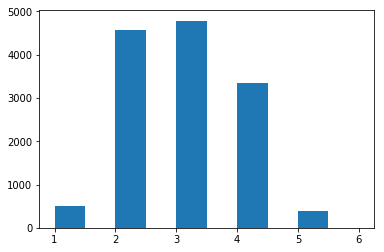

In [7]:
plt.hist(y_train)

(array([ 12.,   0., 419.,   0., 482.,   0., 266.,   0.,  36.,   1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

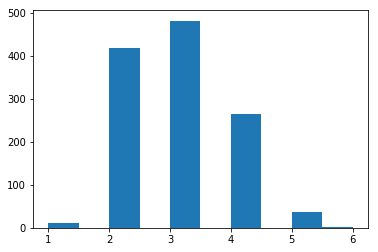

In [11]:
plt.hist(y_test)